In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting options to see all columns in df
pd.set_option('display.max_columns', None)


In [4]:
# Reading tenant data
tenant_purchase_complete_df = pd.read_csv('./csv_data/tenant_purchase_complete.csv')
tenant_purchase_attemp_df = pd.read_csv('./csv_data/tenant_purchase_attempt.csv')

/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_66966/3734314197.py:2: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  tenant_purchase_complete_df = pd.read_csv('./csv_data/tenant_purchase_complete.csv')
/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_66966/3734314197.py:3: DtypeWarning: Columns (30,89,90,91,92,93,94,95,96,97,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  tenant_purchase_attemp_df = pd.read_csv('./csv_data/tenant_purchase_attempt.csv')


In [5]:
# Replace spaces with underscores in columns names
tenant_purchase_attemp_df.columns  = [columns.replace(" ", "_") for columns in tenant_purchase_attemp_df.columns]
tenant_purchase_complete_df.columns  = [columns.replace(" ", "_") for columns in tenant_purchase_complete_df.columns]
# Define palette colors for plots
palette_colors = [ '#76bb20','#49b4df', '#062a74', '#e3048d']

In [6]:
# Distribution of users by city and region
# Drop duplicates to get the last city and region of each user 
attempt_city_region_tenant = tenant_purchase_attemp_df[["User_Fingerprint", "$city", "$region"]].drop_duplicates(subset=["User_Fingerprint"], keep="last")
complete_city_region_tenant = tenant_purchase_complete_df[["User_Fingerprint", "$city", "$region"]].drop_duplicates(subset=["User_Fingerprint"], keep="last")
# Concatenate both dataframes attempt and complete to get all users
region_city_all_users = pd.concat([attempt_city_region_tenant, complete_city_region_tenant], axis=0)
region_city_all_users = region_city_all_users.drop_duplicates(subset=["User_Fingerprint"], keep="last")
# Getting the top 20 cities and regions
city = region_city_all_users["$city"].value_counts().head(20)
region = region_city_all_users["$region"].value_counts().head(20)



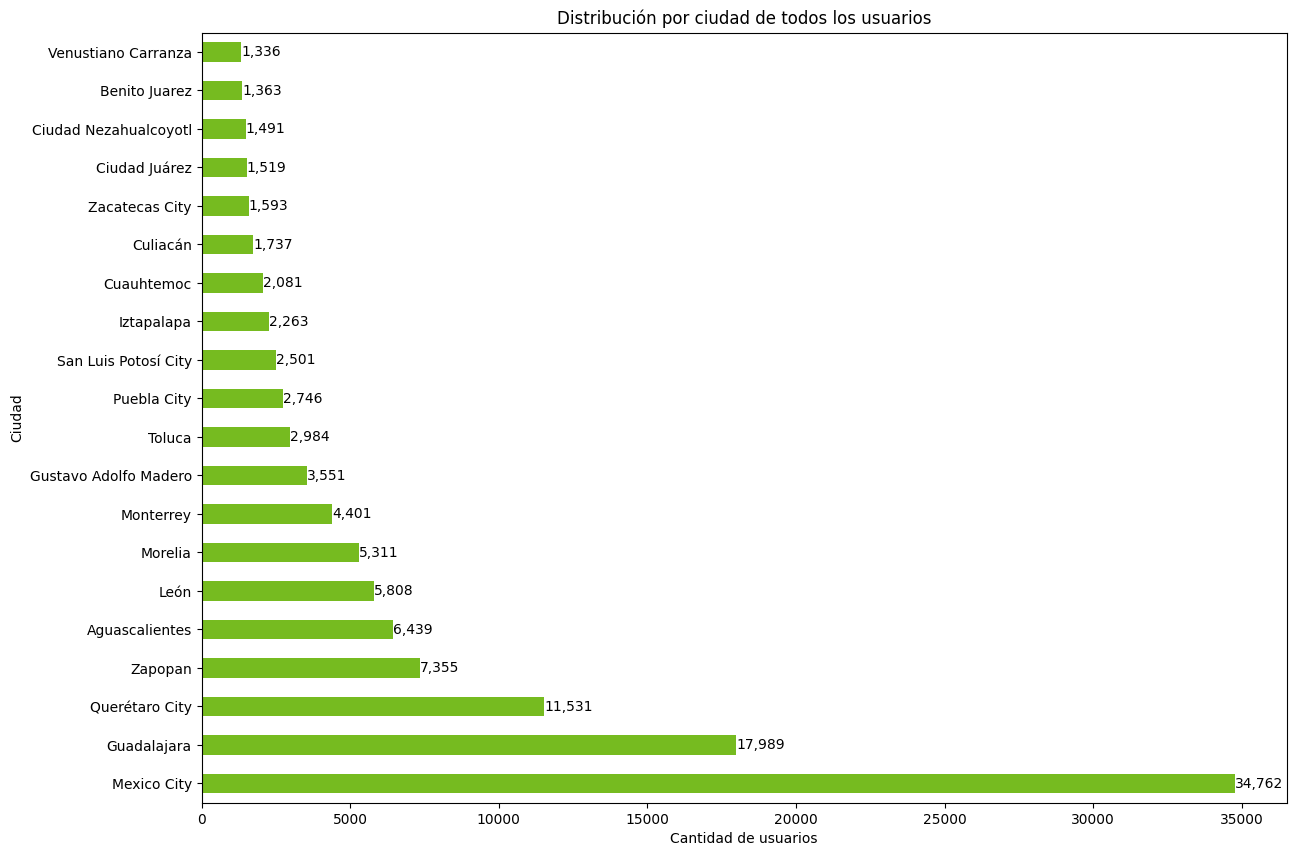

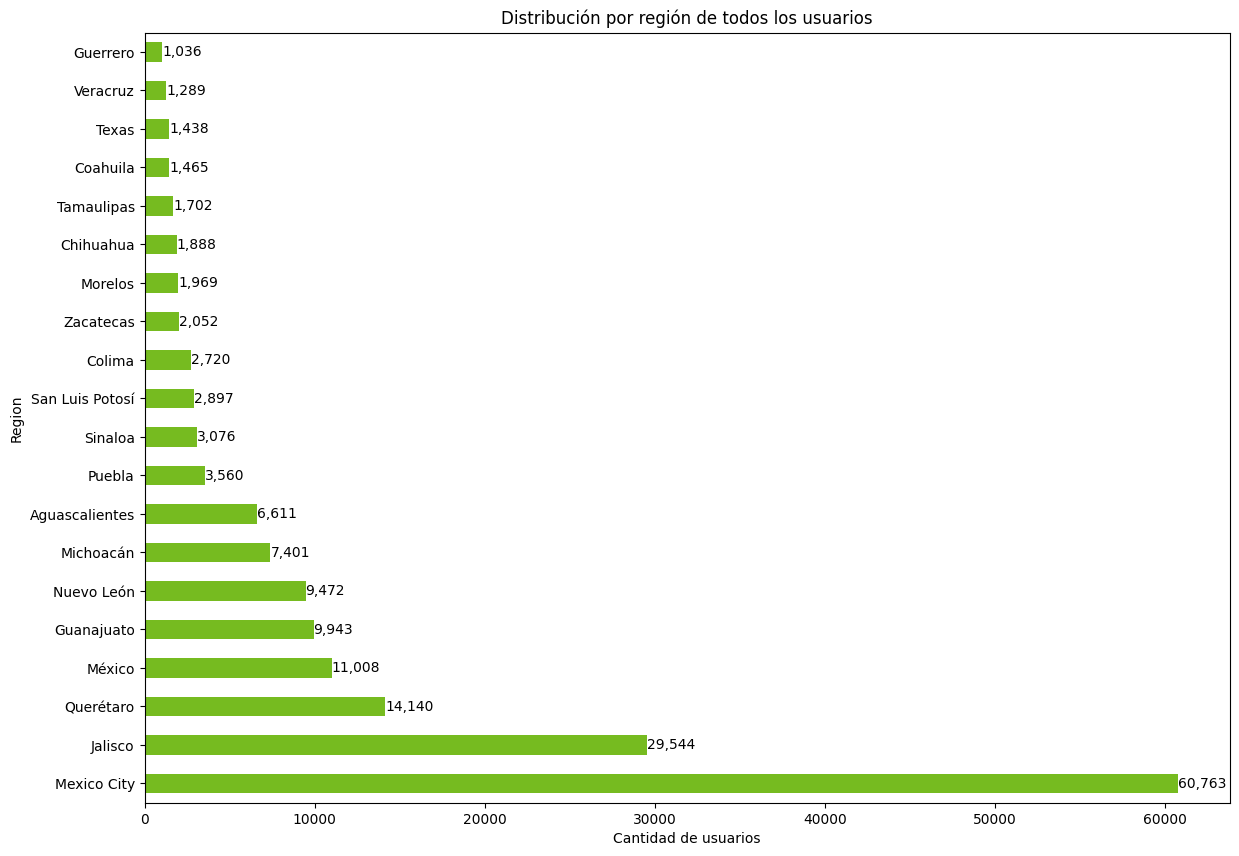

In [7]:
# Show the distribution of users by city and region
plt.figure(figsize=(14, 10))
ax = city.plot(kind='barh', title='Distribución por ciudad de todos los usuarios', color='#76bb20')
plt.xlabel('Cantidad de usuarios')
plt.ylabel('Ciudad')

for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + i.get_height()/2, f"{int(i.get_width()):,}",
            va='center')


plt.figure(figsize=(14, 10))
ax = region.plot(kind='barh', title='Distribución por región de todos los usuarios', color='#76bb20')
plt.xlabel('Cantidad de usuarios')
plt.ylabel('Region')

for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + i.get_height()/2, f"{int(i.get_width()):,}",
            va='center')
    
plt.show()

In [8]:
#Frecuency of users by number of purchases completed
frecuency_per_user = tenant_purchase_complete_df["User_Fingerprint"].value_counts()

segments = pd.cut(frecuency_per_user, bins=[0, 1, 5, 10, float('inf')],
                  labels=['1 compra', '2-5 compras', '6-10 compras', 'Más de 10 compras'])

segment_distribution = segments.value_counts()


/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_66966/3567471685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=segment_distribution.index, y=segment_distribution.values, palette=palette_colors)


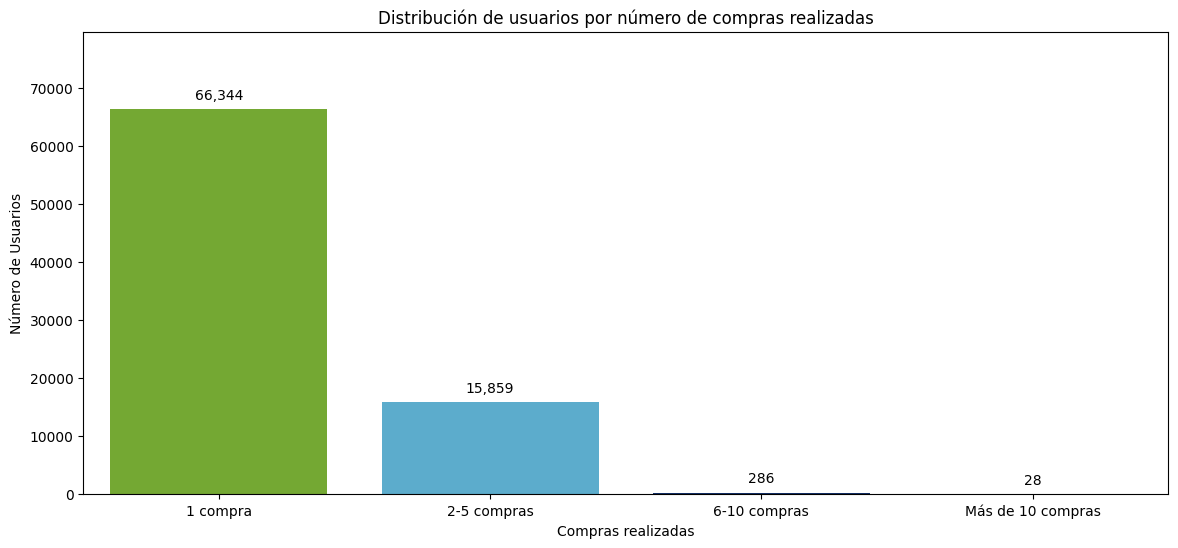

In [9]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=segment_distribution.index, y=segment_distribution.values, palette=palette_colors)

plt.title('Distribución de usuarios por número de compras realizadas')
plt.xlabel('Compras realizadas')
plt.ylabel('Número de Usuarios')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center',  
                xytext=(0, 10), 
                textcoords='offset points')

ax.set_ylim(0, segment_distribution.max() * 1.2)

plt.show()

In [10]:
# Recurrent users vs unique users
unique_users = tenant_purchase_complete_df.groupby('User_Fingerprint').count()
unique_users["event"] = unique_users["event"].apply(lambda x : "recurring_user" if x > 1  else "unique_user")
user_counts = unique_users["event"].value_counts()

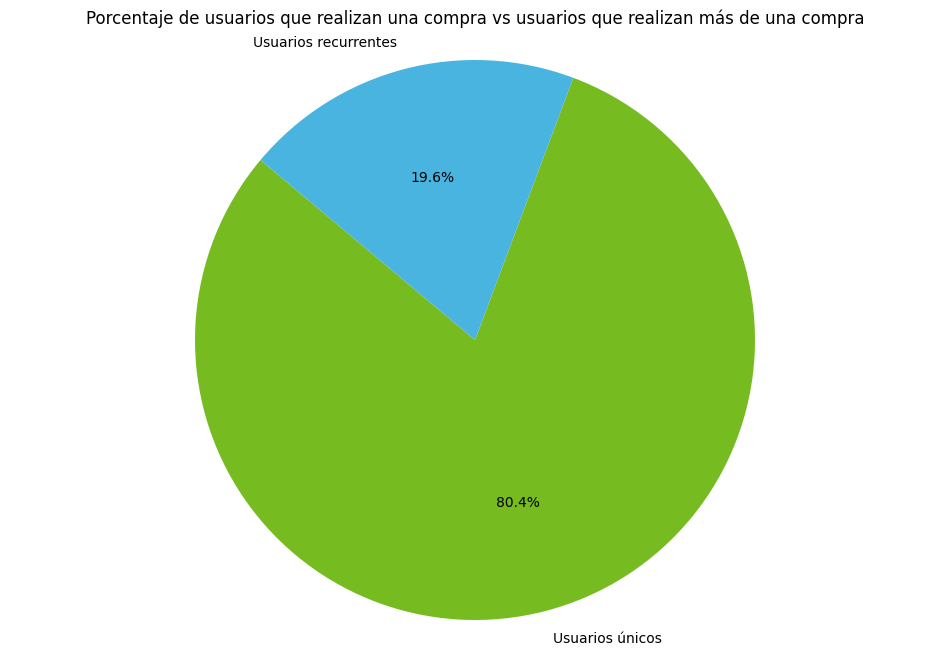

In [11]:
plt.figure(figsize=(12, 8))
plt.pie(user_counts, labels=["Usuarios únicos", "Usuarios recurrentes"], autopct='%1.1f%%', startangle=140, colors=palette_colors)
plt.title('Porcentaje de usuarios que realizan una compra vs usuarios que realizan más de una compra')
plt.axis('equal')
plt.show()

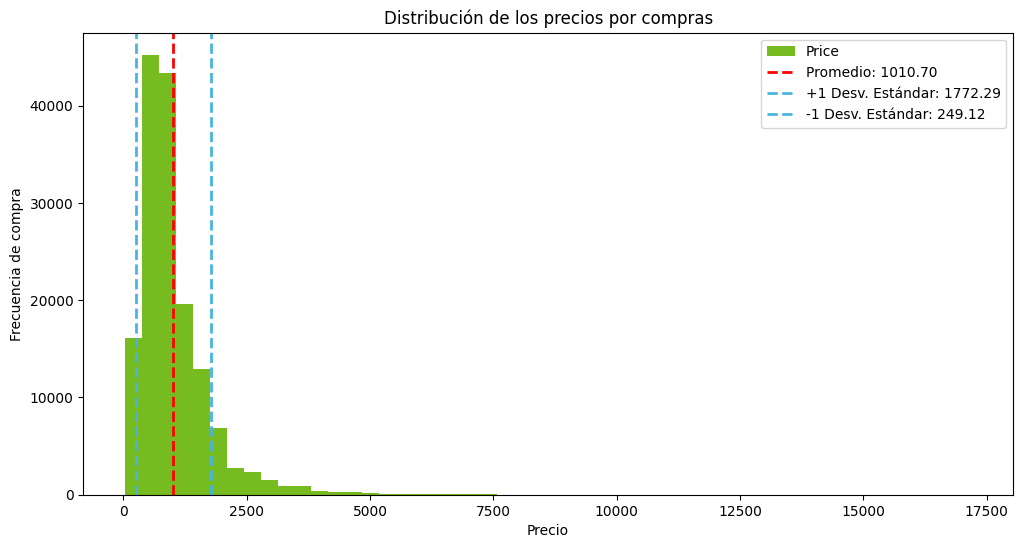

In [12]:
# Distribution of prices by purchases 
tenant_purchase_complete_df['Price'] = pd.to_numeric(tenant_purchase_complete_df['Departure_Price'], errors='coerce')
mean_price = tenant_purchase_complete_df['Price'].mean()
std_price = tenant_purchase_complete_df['Price'].std()

plt.figure(figsize=(12, 6))
tenant_purchase_complete_df['Price'].plot(kind='hist', bins=50, color='#76bb20')
plt.title('Distribución de los Precios de las Compras')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: {mean_price:.2f}')
plt.axvline(mean_price + std_price, color='#49b4df', linestyle='dashed', linewidth=2, label=f'+1 Desv. Estándar: {mean_price + std_price:.2f}')
plt.axvline(mean_price - std_price, color='#49b4df', linestyle='dashed', linewidth=2, label=f'-1 Desv. Estándar: {mean_price - std_price:.2f}')

plt.title('Distribución de los precios por compras')
plt.xlabel('Precio')
plt.ylabel('Frecuencia de compra')
plt.legend()
plt.show()

In [13]:
#convert timemestamp unix to datetime
tenant_purchase_complete_df['time'] = pd.to_datetime(tenant_purchase_complete_df['time'], unit='s')

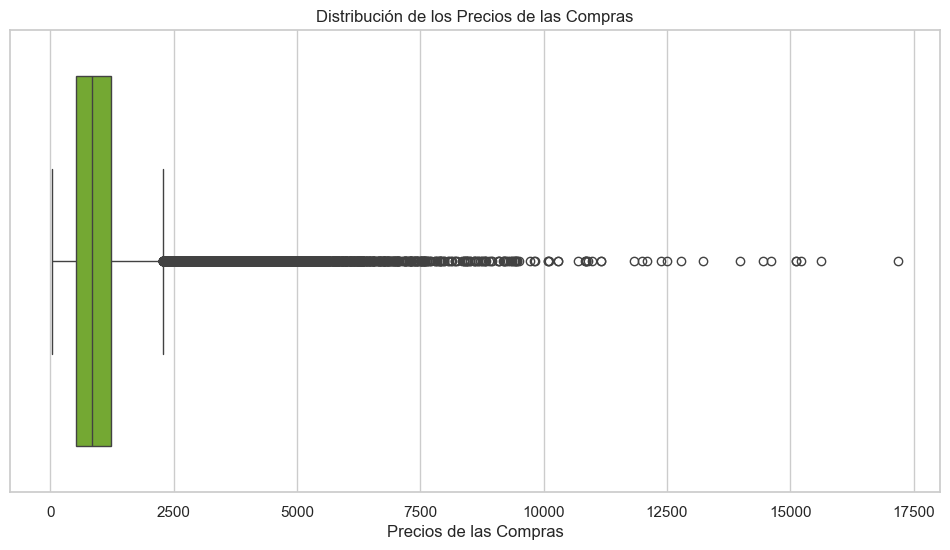

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x=tenant_purchase_complete_df['Price'].dropna(), color="#76bb20")
plt.title('Distribución de los Precios de las Compras')
plt.xlabel('Precios de las Compras')
plt.show()

In [15]:
# Adding aditional information to the dataframe Hours
tenant_purchase_complete_df['hour'] = tenant_purchase_complete_df['time'].dt.hour
tenant_purchase_complete_df['weekDay'] = tenant_purchase_complete_df['time'].dt.day_name(locale='es_ES')

In [16]:
tenant_purchase_complete_df['hour'] = tenant_purchase_complete_df['time'].dt.hour
purchases_per_hour = tenant_purchase_complete_df['hour'].value_counts().sort_index()

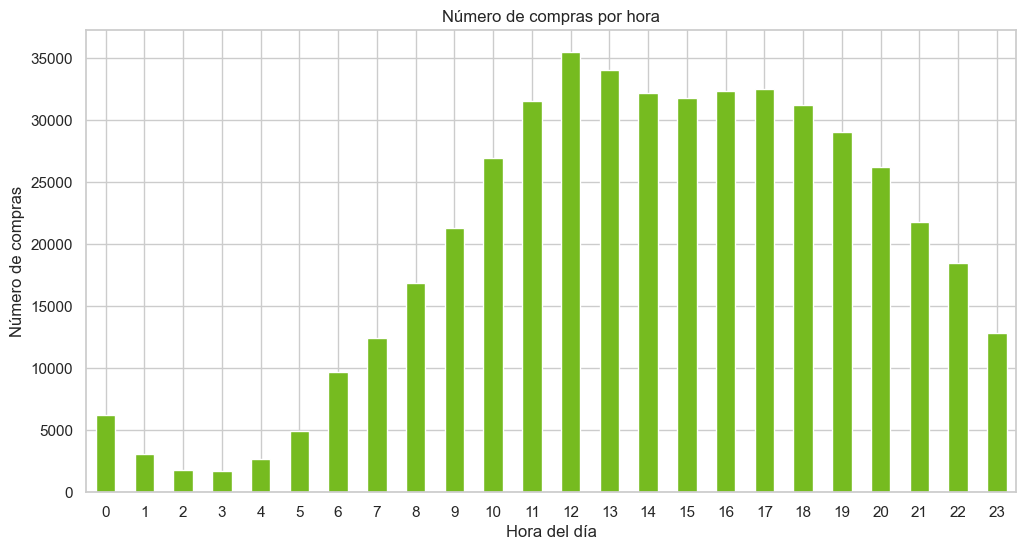

In [17]:
plt.figure(figsize=(12, 6))
purchases_per_hour.plot(kind='bar',color="#76bb20")
plt.title('Número de compras por hora')
plt.xlabel('Hora del día')
plt.ylabel('Número de compras')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [18]:


purchases_weekday = tenant_purchase_complete_df['weekDay'].value_counts().reindex([
    "Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"
])

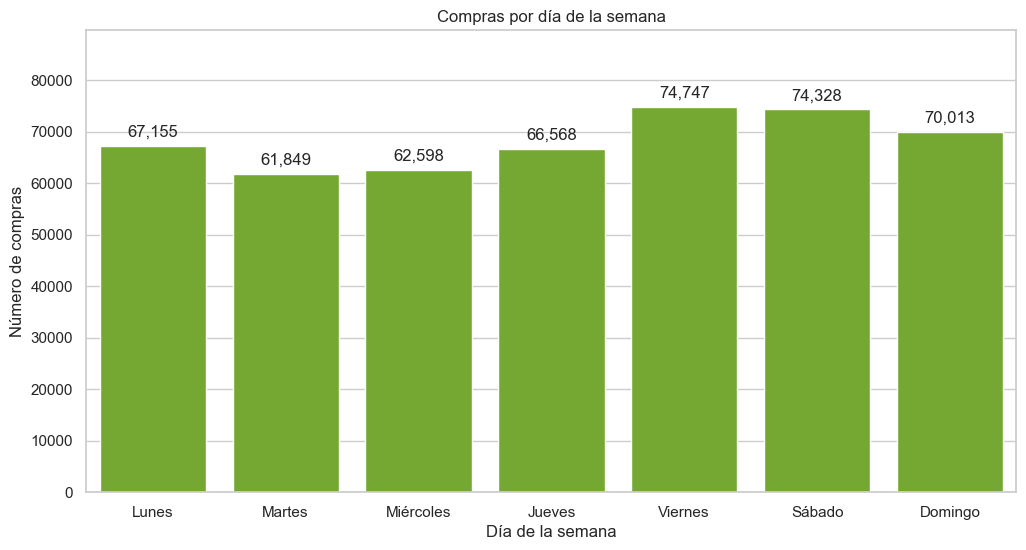

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=purchases_weekday.index, y=purchases_weekday.values, color="#76bb20")

ax.set_title('Compras por día de la semana')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Número de compras')
ax.set_ylim(0, purchases_weekday.max() * 1.2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

(array([19875., 19879., 19883., 19887., 19891., 19895., 19899., 19903.,
        19905.]),
 [Text(19875.0, 0, '2024-06-01'),
  Text(19879.0, 0, '2024-06-05'),
  Text(19883.0, 0, '2024-06-09'),
  Text(19887.0, 0, '2024-06-13'),
  Text(19891.0, 0, '2024-06-17'),
  Text(19895.0, 0, '2024-06-21'),
  Text(19899.0, 0, '2024-06-25'),
  Text(19903.0, 0, '2024-06-29'),
  Text(19905.0, 0, '2024-07-01')])

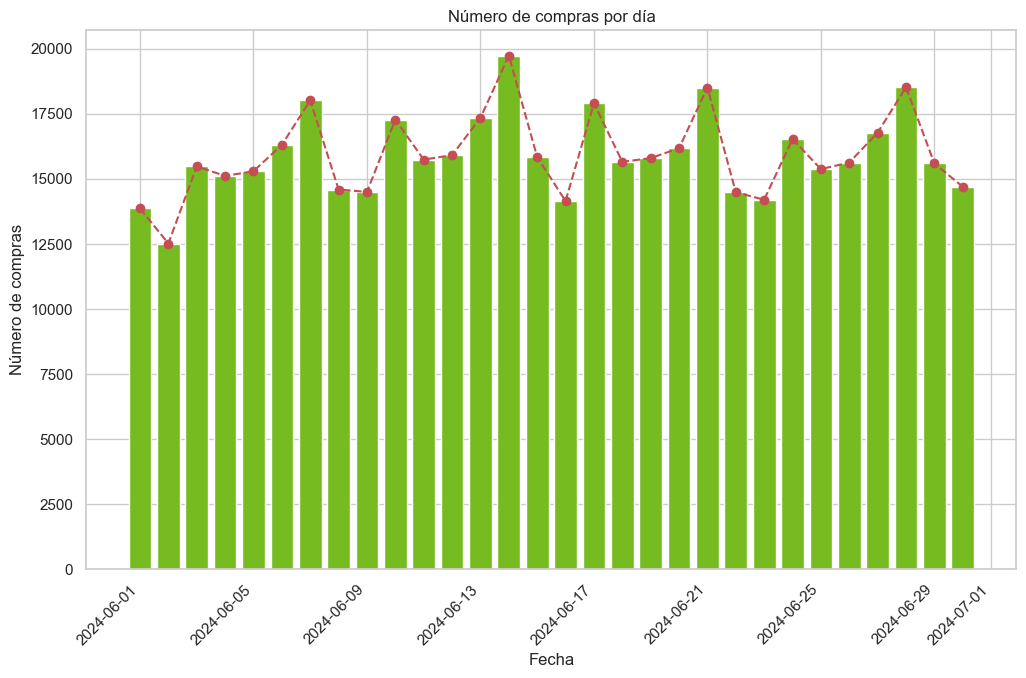

In [20]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(tenant_purchase_complete_df["time"].dt.date.value_counts().sort_index().index,tenant_purchase_complete_df["time"].dt.date.value_counts().sort_index(), color="#76bb20")
ax.plot(tenant_purchase_complete_df["time"].dt.date.value_counts().sort_index(), 'r--', marker='o', label='Línea Punteada')
plt.title('Número de compras por día')
plt.xlabel('Fecha')
plt.ylabel('Número de compras')
plt.xticks(rotation=45, ha='right') 

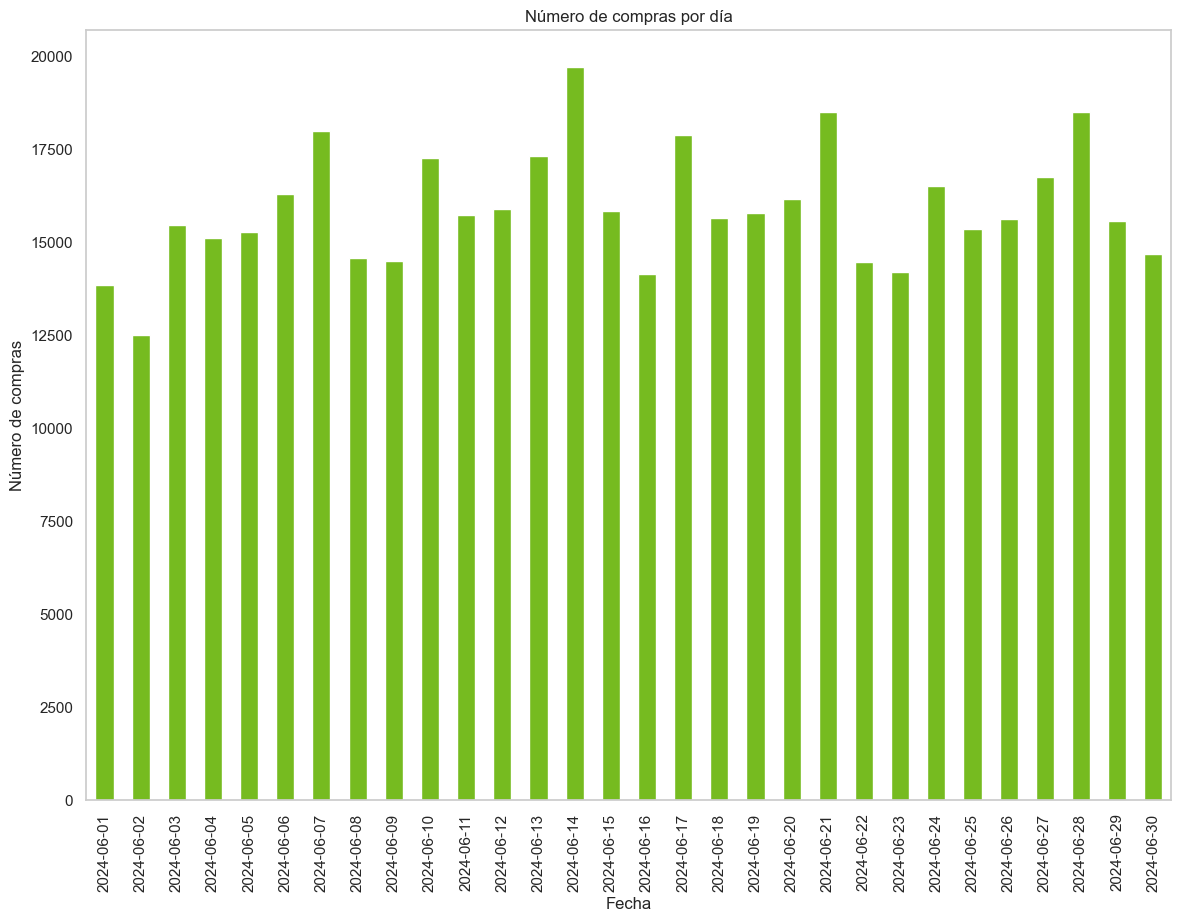

In [21]:
purchases_by_date = tenant_purchase_complete_df["time"].dt.date.value_counts().sort_index()


plt.figure(figsize=(14, 10))
ax = purchases_by_date.plot(kind="bar", title="Número de compras por día", color="#76bb20")
ax.grid()
plt.xlabel("Fecha")
plt.ylabel("Número de compras")
plt.show()



/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_66966/2782785417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tenant_purchase_complete_df["Payment_Type"].value_counts().index, y=tenant_purchase_complete_df["Payment_Type"].value_counts().values, palette=palette_colors[:4])


Text(0, 0.5, 'Número de compras')

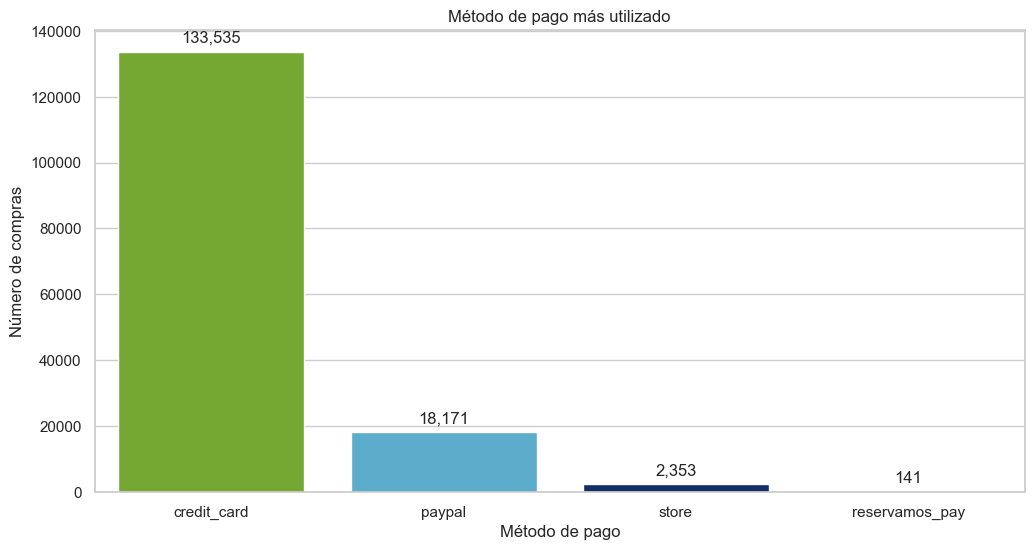

In [22]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=tenant_purchase_complete_df["Payment_Type"].value_counts().index, y=tenant_purchase_complete_df["Payment_Type"].value_counts().values, palette=palette_colors[:4])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
    
plt.title('Método de pago más utilizado')
plt.xlabel('Método de pago')
plt.ylabel('Número de compras')

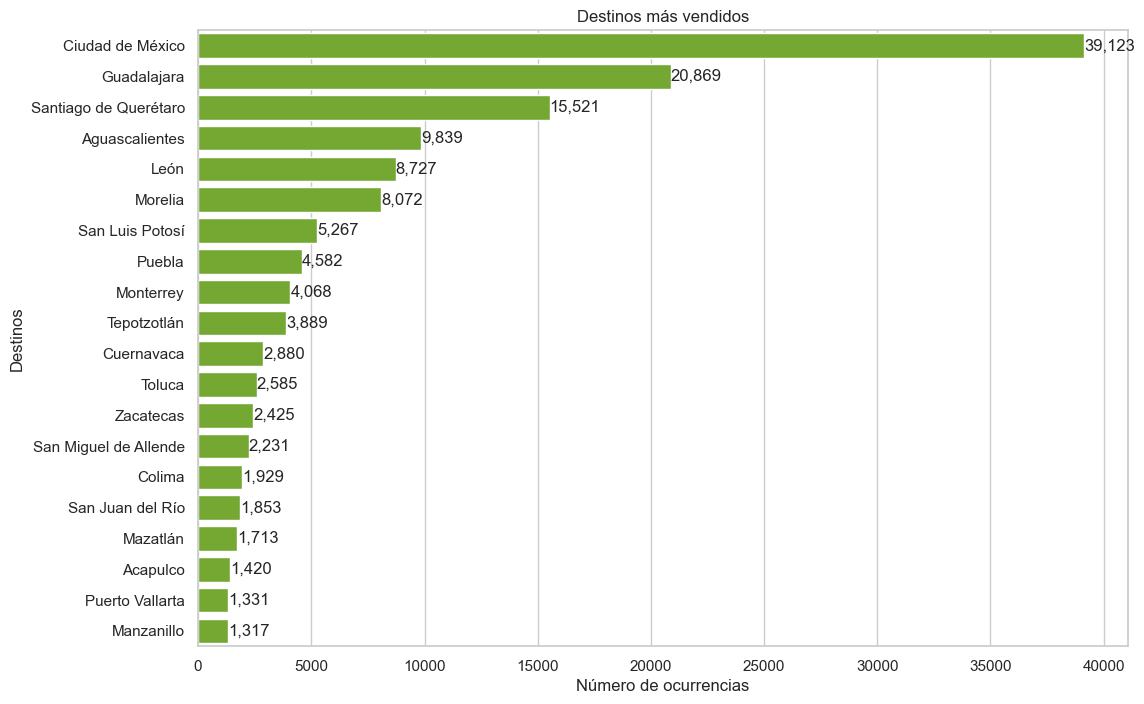

In [23]:
# Top 20 most popular destinations 
popular_destinations = tenant_purchase_complete_df["Departure_Destination"].value_counts().head(20)

plt.figure(figsize=(12, 8))
ax = sns.barplot(y=popular_destinations.index, x=popular_destinations.values, color="#76bb20" , orient='h')

ax.set_title('Destinos más vendidos')
ax.set_xlabel('Número de ocurrencias')
ax.set_ylabel('Destinos')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 3,  
             p.get_y() + p.get_height() / 2, 
            f'{int(width):,}',
             va='center')

plt.show()

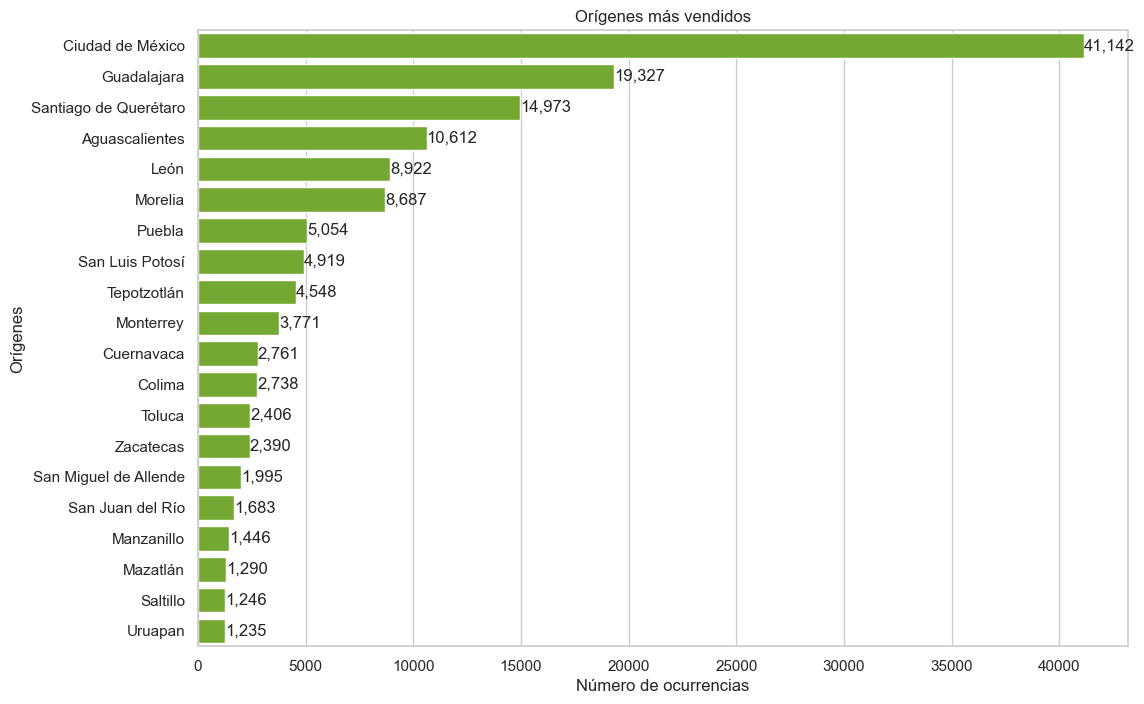

In [24]:
# Top 20 most popular origins
popular_origins = tenant_purchase_complete_df["Departure_Origin"].value_counts().head(20)


plt.figure(figsize=(12, 8))
ax = sns.barplot(y=popular_origins.index, x=popular_origins.values, color="#76bb20" , orient='h')


ax.set_title('Orígenes más vendidos')
ax.set_xlabel('Número de ocurrencias')
ax.set_ylabel('Orígenes')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 3,  
             p.get_y() + p.get_height() / 2, 
             f'{int(width):,}', 
             va='center')

plt.show()

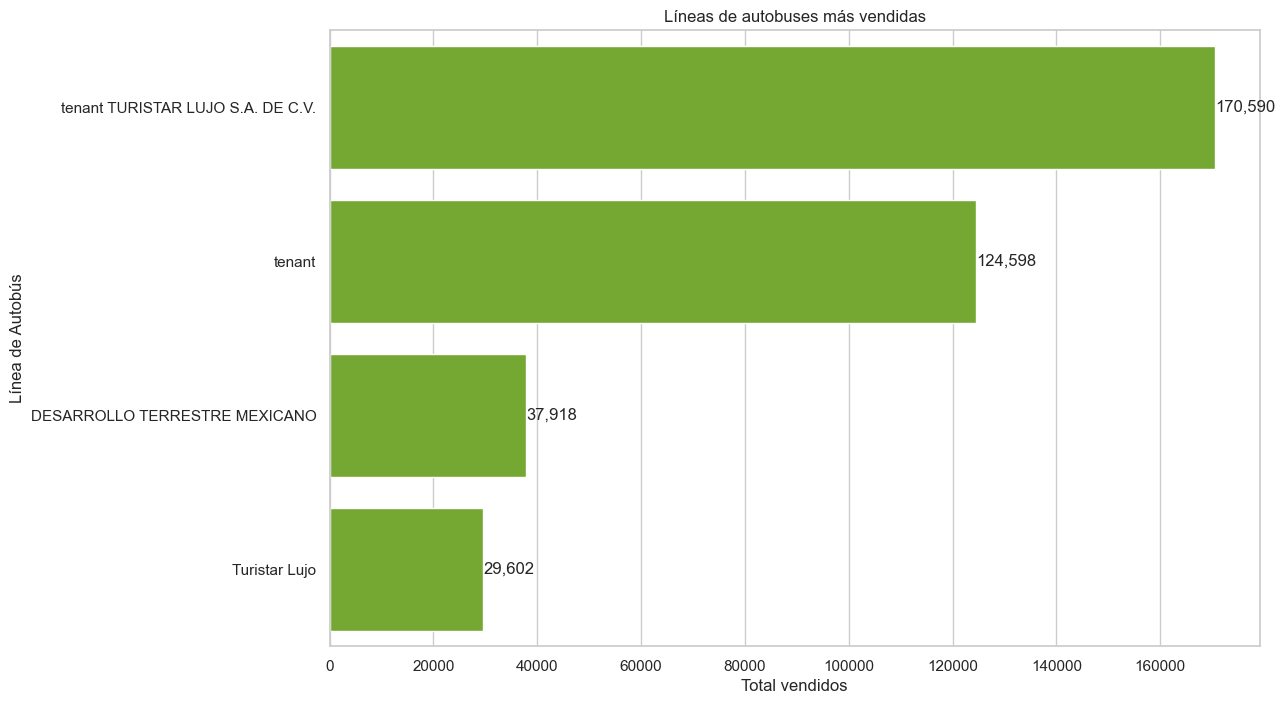

In [25]:
# Getting the top 20 most popular bus lines
popular_lines = tenant_purchase_complete_df["Departure_Line"].value_counts().head(20)


plt.figure(figsize=(12, 8))
ax = sns.barplot(y=popular_lines.index, x=popular_lines.values, color="#76bb20" , orient='h')
ax.set_title('Líneas de autobuses más vendidas')
ax.set_xlabel('Total vendidos')
ax.set_ylabel('Línea de Autobús')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 3,  
             p.get_y() + p.get_height() / 2, 
             f'{int(width):,}', 
             va='center')

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Taquillas'),
  Text(1, 0, 'web-mobile'),
  Text(2, 0, 'web'),
  Text(3, 0, 'ios'),
  Text(4, 0, 'android'),
  Text(5, 0, 'Internet'),
  Text(6, 0, 'Centro Telefónico'),
  Text(7, 0, 'Agencia Internet'),
  Text(8, 0, 'Agencia SUC')])

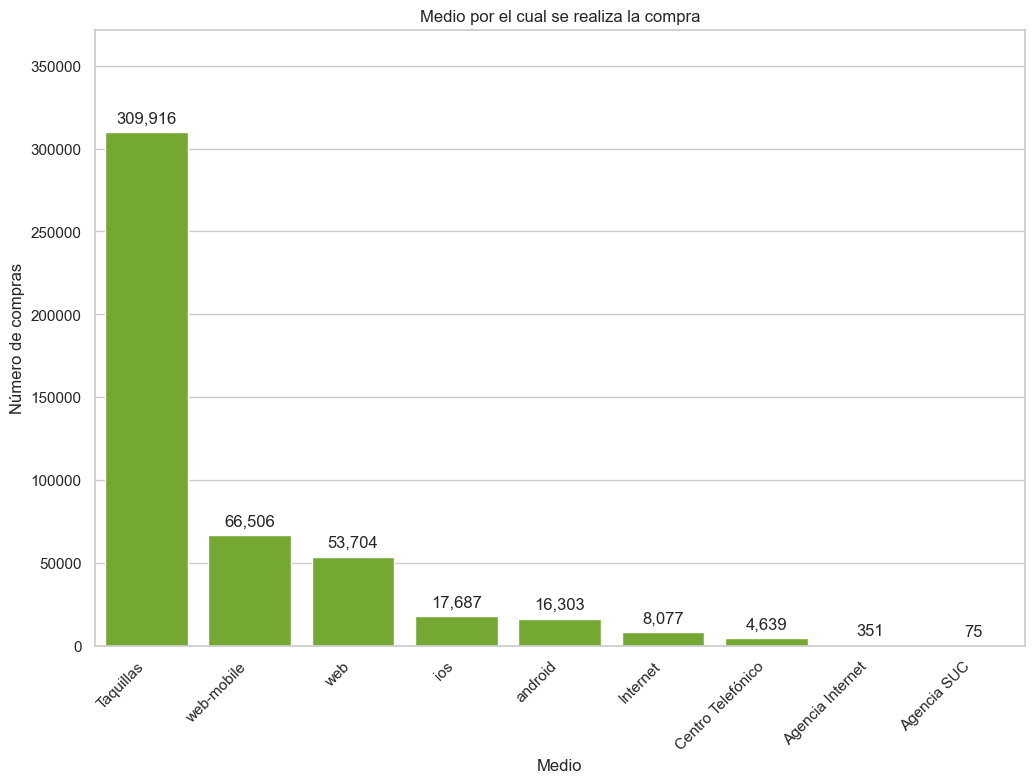

In [26]:
product = tenant_purchase_complete_df["product"].value_counts()
plt.figure(figsize=(12, 8))

ax = sns.barplot(x=product.index, y=product.values, color="#76bb20")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
    
ax.set_ylim(0, product.max() * 1.2)
    
plt.title('Medio por el cual se realiza la compra')
plt.xlabel('Medio')
plt.ylabel('Número de compras')
plt.xticks(rotation=45, ha='right') 


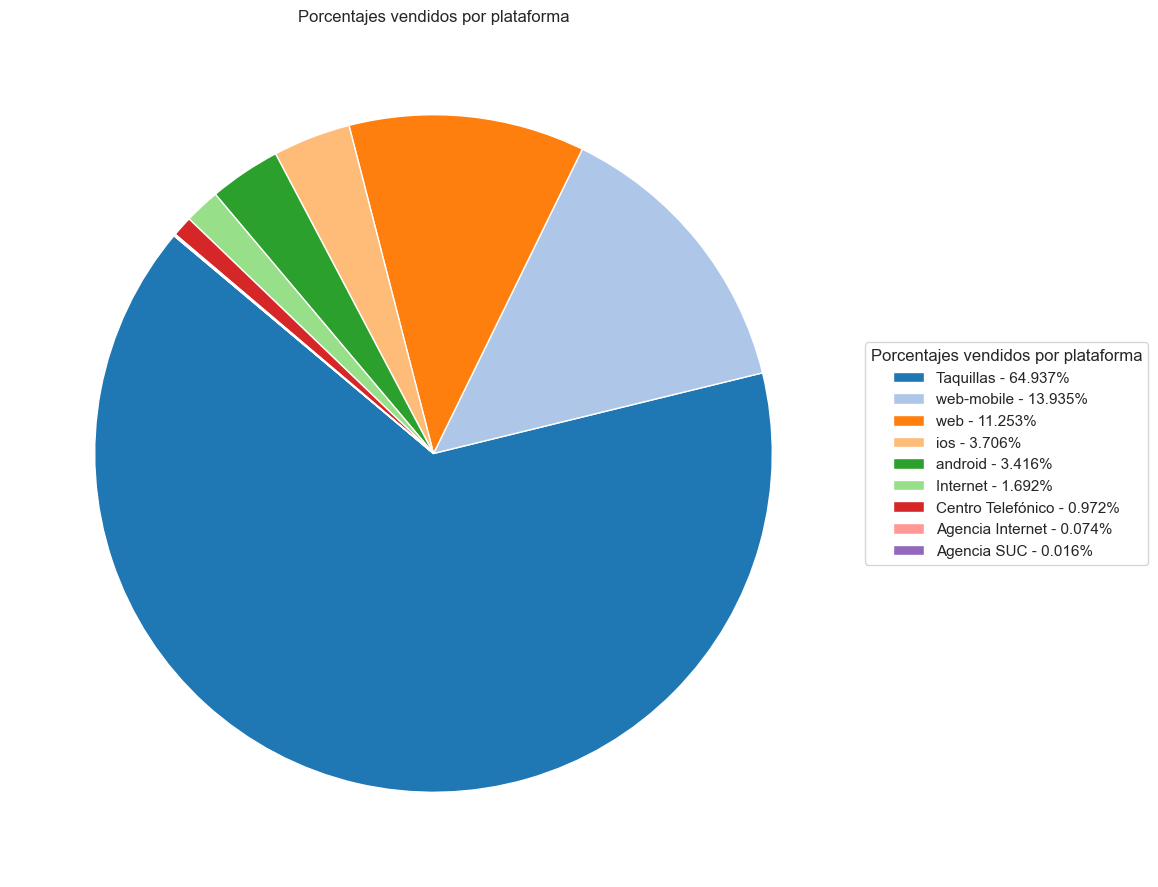

In [27]:
fig, ax = plt.subplots(figsize=(12, 11))
wedges, texts = ax.pie(product, startangle=140, colors=plt.get_cmap('tab20').colors)

plt.title('Porcentajes vendidos por plataforma')

percentages = [f'{100 * p / product.sum():.3f}%' for p in product]
labels = [f'{l} - {p}' for l, p in zip(product.index, percentages)]

ax.legend(wedges, labels,
          title="Porcentajes vendidos por plataforma",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [28]:
# adding "YYYY-MM-DD" column to the dataframes to merge them
tenant_purchase_attemp_df["time"] = pd.to_datetime(tenant_purchase_attemp_df["time"], unit='s')
tenant_purchase_attemp_df["datetime"] = tenant_purchase_attemp_df["time"].dt.date
tenant_purchase_complete_df["datetime"] = tenant_purchase_complete_df["time"].dt.date

In [29]:
# Remove taquillas from dataset
tenant_purchase_complete_df_without_taquillas = tenant_purchase_complete_df[tenant_purchase_complete_df["product"] != "Taquillas"]

In [30]:
tenant_purchase_attemp_df_without_duplicates = tenant_purchase_attemp_df.drop_duplicates(subset=["User_Fingerprint", "datetime"], keep="first")
uninio_df = tenant_purchase_complete_df_without_taquillas.merge(tenant_purchase_attemp_df_without_duplicates, on=["User_Fingerprint", "datetime"], how="left", suffixes=('_complete', '_attempt'))
uninio_df["time_until_complete"] = (uninio_df["time_complete"] - uninio_df["time_attempt"]).dt.total_seconds() /60
uninio_df = uninio_df[~uninio_df["User_Fingerprint"].isna()]
uninio_df = uninio_df [uninio_df["time_until_complete"] > 0]


bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-5 minutos', '5-10 minutos', '10-15 minutos', '15-20 minutos', '20-30 minutos', '30-40 minutos', '40-50 minutos', '50-60 minutos', "60+"]


uninio_df['time_category'] = pd.cut(uninio_df['time_until_complete'], bins=bins, labels=labels, right=False)

time_distribution = uninio_df['time_category'].value_counts().sort_index()

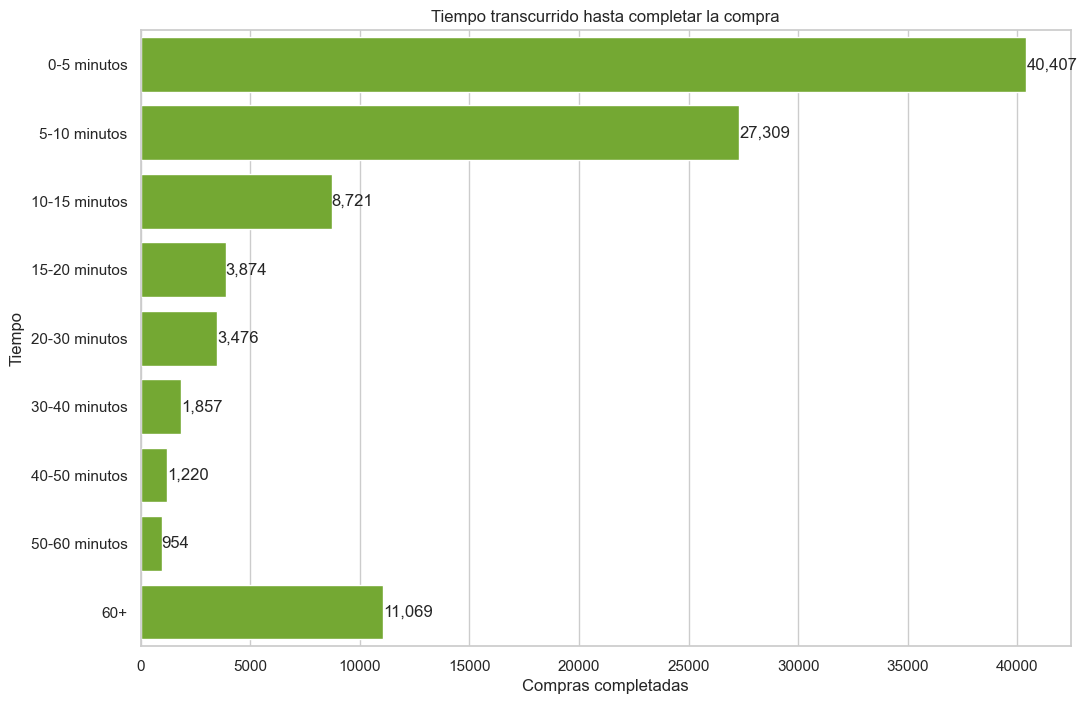

In [31]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=time_distribution.values, y=time_distribution.index, color="#76bb20")

ax.set_title('Tiempo transcurrido hasta completar la compra')
ax.set_xlabel('Compras completadas')
ax.set_ylabel('Tiempo')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1,  
             p.get_y() + p.get_height() / 2,  
             f'{int(width):,}', 
             va='center')

plt.show()

In [34]:
# Drop duplicates to avoid duplicates in the merge, also to only have the first attempt in day by user
reservamos_purchase_attemp_df_without_duplicates = tenant_purchase_attemp_df.drop_duplicates(subset=["User_Fingerprint", "datetime"], keep="first")

# Merge dataframes to exclude users that complete the purchase
merge_df = reservamos_purchase_attemp_df_without_duplicates.merge(uninio_df, on=["User_Fingerprint", "datetime"], how='left', indicator=True)

#Filter user who don't complete the purchase 
users_not_completing_purchase = merge_df[merge_df['_merge'] == 'left_only']

#results
user_not_complete_purchase = users_not_completing_purchase.shape[0]
user_complete_purchase = uninio_df.shape[0]



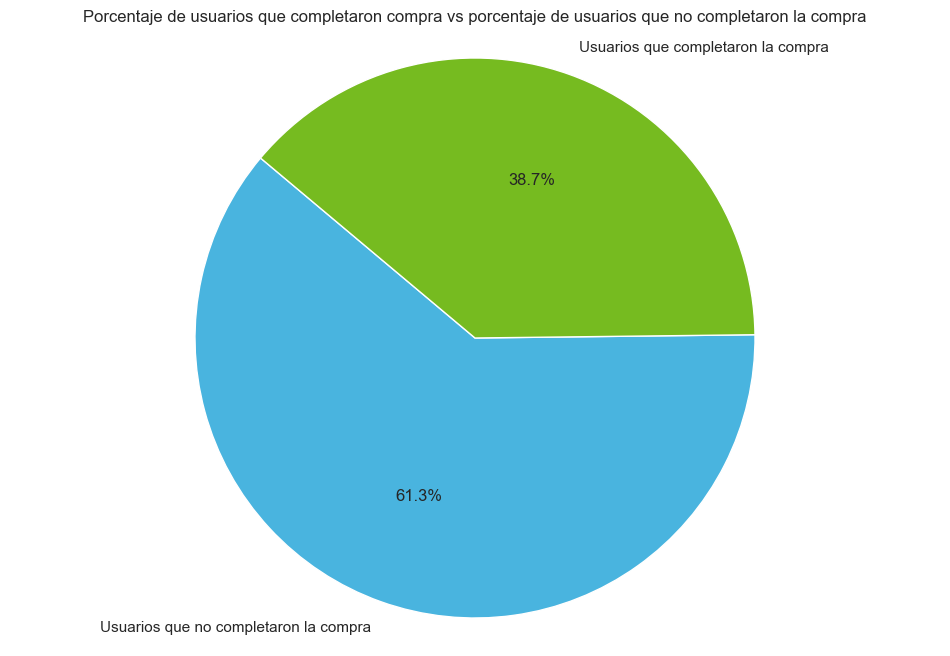

In [35]:
plt.figure(figsize=(12, 8))
plt.pie([user_not_complete_purchase, user_complete_purchase], labels=['Usuarios que no completaron la compra', 'Usuarios que completaron la compra'], autopct='%1.1f%%', startangle=140, colors=['#49b4df','#76bb20']) 
plt.title('Porcentaje de usuarios que completaron compra vs porcentaje de usuarios que no completaron la compra')
plt.axis('equal')
plt.show()